# Analysis

**Hypothesis**: Severe COVID‐19 drives increased metabolic stress in specific immune cell populations. In particular, monocytes and T cells from COVID patients—especially those requiring ventilation—will exhibit elevated mitochondrial gene expression (percent.mt) compared to healthy controls, reflecting heightened metabolic dysregulation. Moreover, differences in ventilation status (NonVent vs Vent) may further stratify the severity of metabolic stress and its linkage to augmented inflammatory signaling.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


Loading data...


Data loaded: 44721 cells and 26361 genes


# Analysis Plan

**Hypothesis**: Severe COVID‐19 drives increased metabolic stress in specific immune cell populations. In particular, monocytes and T cells from COVID patients—especially those requiring ventilation—will exhibit elevated mitochondrial gene expression (percent.mt) compared to healthy controls, reflecting heightened metabolic dysregulation. Moreover, differences in ventilation status (NonVent vs Vent) may further stratify the severity of metabolic stress and its linkage to augmented inflammatory signaling.

## Steps:
1. Step 1: Filter the dataset to retain only the key immune cell populations of interest (CD14 Monocytes, CD16 Monocytes, CD4 T cells, and CD8 T cells) using the 'cell_type_coarse' annotations.
2. Step 2: Perform exploratory data analysis by visualizing the distribution of percent.mt across these cell types. Incorporate stratification by both disease Status (COVID vs Healthy) and Ventilation status (Healthy for controls, NonVent, Vent for COVID patients) using grid plots (e.g., seaborn's catplot) for clear comparison.
3. Step 3: Conduct statistical tests (Mann–Whitney U test) for each cell type comparing COVID and Healthy groups. If sample sizes permit, further assess these differences within ventilation subgroups, printing test statistics and p-values.
4. Step 4: Investigate the association of mitochondrial stress with inflammatory signals by correlating percent.mt with IFN1 values. Generate scatter plots with trend lines for the relevant cell types and compute correlation coefficients.
5. Step 5: Summarize the findings in figures and tables—highlighting cell type–specific changes in mitochondrial gene expression and their relationship to both disease severity and ventilation status—to infer whether metabolic dysregulation contributes to the immunopathology observed in severe COVID‐19.


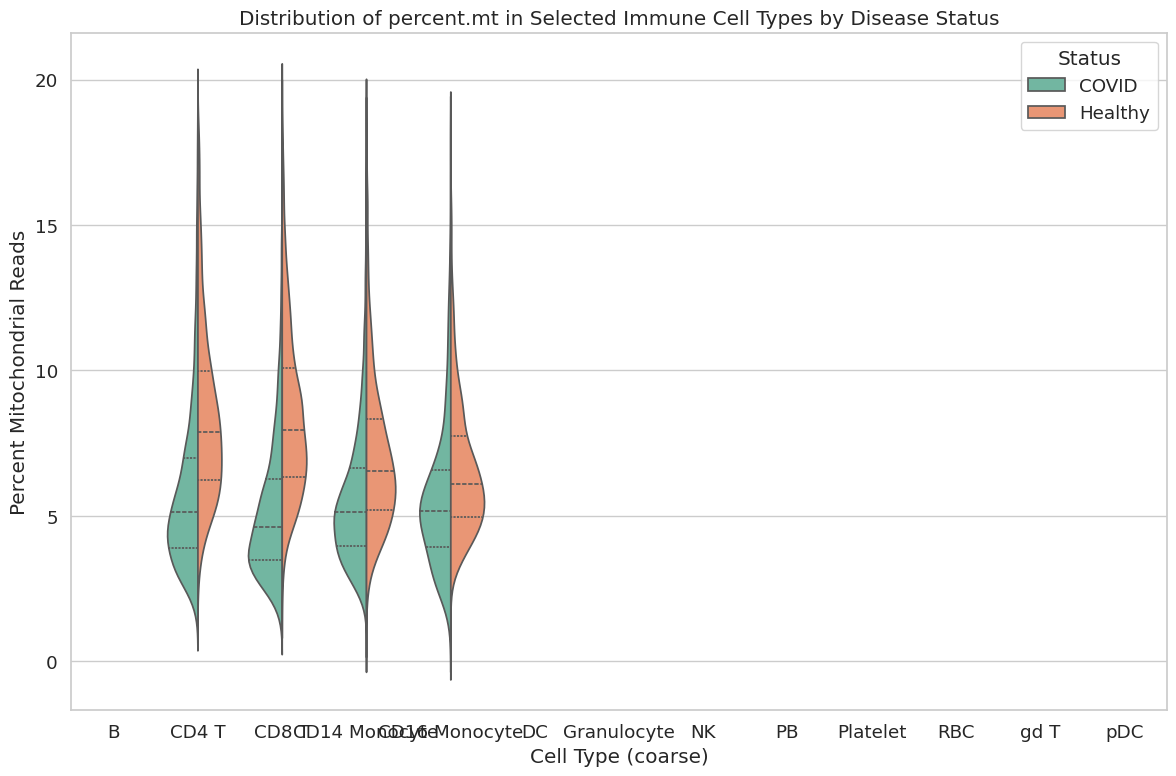

Mann-Whitney U Test Results for percent.mt:
Cell Type: CD14 Monocyte - U statistic: 5423155.500, p-value: 3.209e-143
Cell Type: CD16 Monocyte - U statistic: 141662.500, p-value: 2.763e-17
Cell Type: CD4 T - U statistic: 3601992.500, p-value: 0.000e+00
Cell Type: CD8 T - U statistic: 1907543.000, p-value: 0.000e+00


In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Step 1: Filter the adata for monocytes and T cells (using cell_type_coarse annotation)
# We select cell types: 'CD14 Monocyte', 'CD16 Monocyte', 'CD4 T', 'CD8 T'
selected_types = ['CD14 Monocyte', 'CD16 Monocyte', 'CD4 T', 'CD8 T']

# Create a DataFrame from adata.obs for easier plotting and manipulation
obs_df = adata.obs.copy()
filtered_df = obs_df[obs_df['cell_type_coarse'].isin(selected_types)].copy()

# Create a combined column for disease status and ventilation (if available) for stratification
# Ventilated has values like 'Healthy', 'NonVent', 'Vent'. For COVID patients, we can use this information.
# Here, simply keep the Status and Ventilated columns.

# Plotting: Violin plots of percent.mt for each cell type stratified by Status (COVID vs Healthy)
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='cell_type_coarse', y='percent_mt', hue='Status', split=True, inner='quart', palette='Set2')
plt.title('Distribution of percent.mt in Selected Immune Cell Types by Disease Status')
plt.xlabel('Cell Type (coarse)')
plt.ylabel('Percent Mitochondrial Reads')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Save the figure if desired
# plt.savefig('percent_mt_violin_by_celltype_and_status.png', dpi=300)

# For demonstration, perform a Mann-Whitney U test for each cell type comparing COVID vs Healthy
print('Mann-Whitney U Test Results for percent.mt:')
for cell_type in selected_types:
    subset = filtered_df[filtered_df['cell_type_coarse'] == cell_type]
    covid = subset[subset['Status'] == 'COVID']['percent_mt']
    healthy = subset[subset['Status'] == 'Healthy']['percent_mt']
    if len(covid) > 0 and len(healthy) > 0:
        stat, p_value = mannwhitneyu(covid, healthy, alternative='two-sided')
        print(f"Cell Type: {cell_type} - U statistic: {stat:.3f}, p-value: {p_value:.3e}")
    else:
        print(f"Cell Type: {cell_type} - Insufficient data for statistical test")